# EX 2
Marco Boscato - 2096921

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import R_earth, M_earth
from Particle import Particles
from my_RungeKutta4 import integrator_rungekutta


# IC
R = R_earth.value/1e3       #kl
GM =  398600.4415           # km^3/s^2
M = M_earth.value/1e3       # M earth kl
m = 1e-29*M 

v0 = 5.0                    # initial velocity of bullet in km/s    
theta = np.pi/4.            # angle of bullet in radians

position = np.array([[0., 0], [0., R]])
velocity = np.array([[0., 0], [v0*np.cos(theta), v0*np.sin(theta)]])
masses = np.array([M, m])

part = Particles(position, velocity, masses)

print(part.pos)
print(part.vel)
print(part.mass)

[[   0.     0. ]
 [   0.  6378.1]]
[[0.         0.        ]
 [3.53553391 3.53553391]]
[5.97216787e+21 5.97216787e-08]


In [2]:
def acceleration_two_body(part):
    acc = np.zeros_like(part.pos)
    denom = np.linalg.norm(part.pos[0] - part.pos[1])**3.
    temp = - GM*(part.pos[0] - part.pos[1])/denom
    acc[0,:] = temp
    acc[1,:] = -temp
    return acc

In [3]:
def adaptive_timestep_r(particles, tmin=None, tmax=None):

    #I use the R/V of the particles to have an estimate of the required timestep
    #I don't want the zeros in this procedure
    r  = particles.radius()
    v  = particles.vel_mod()
    ts = r/v
    eta = 0.1             #proportionality constant  
    ts = eta * np.nanmin(ts[np.nonzero(ts)])

    # Check tmin, tmax
    if tmin is not None: ts=np.max(ts,tmin)
    if tmax is not None: ts=np.min(ts,tmax)

    return ts, tmin, tmax

In [4]:
def integration(part, tstep, maxiter):
    path = [part.pos]
    time = [0.]
    velos = [part.vel]
    energy = [part.Etot_vett()[0]]
    iter = 0

    while (part.radius()[1] >= R) and (iter < maxiter):
        update_particules = integrator_rungekutta(particles=part, tstep=tstep, acceleration_estimator=acceleration_two_body)
        
        path.append(update_particules.pos)
        velos.append(update_particules.vel)
        energy.append(update_particules.Etot_vett()[0])

        h = adaptive_timestep_r(update_particules)[0]
        tstep = h
        time.append(time[-1] + tstep)

        iter += 1

    path = np.array(path)
    velos = np.array(velos)
    energy = np.array(energy)
    time = np.array(time)

    return path, velos, energy, time   

In [5]:
bullet_part = part.copy()
bullet_trajectory, bullet_velocity, bullet_energy, bullet_time = integration(bullet_part, tstep=1e-4, maxiter=1000)

c:\Users\bosca\Desktop\Università\Magistrale\Celestial Mechanics\Homeworks\HW3\Particle.py:128: RuntimeWarning: divide by zero encountered in divide
  Epot = m_ij/(norm2_r_ij + softening**2.)**0.5


In [6]:
# earth surface

Earth_surface = np.linspace(0, 2*np.pi, 1000)
x_earth = R*np.cos(Earth_surface)
y_earth = R*np.sin(Earth_surface)

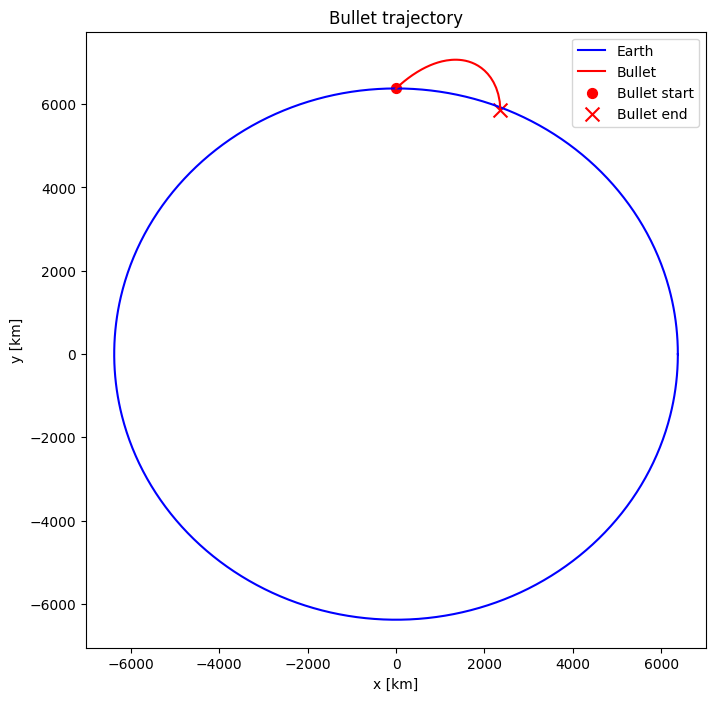

In [7]:
# plot bullet trajectory
plt.figure(figsize=(8,8))
plt.plot(x_earth, y_earth, 'b', label='Earth')
plt.plot(bullet_trajectory[:,1,0], bullet_trajectory[:,1,1], 'r', label='Bullet')
plt.scatter(bullet_trajectory[0,1,0], bullet_trajectory[0,1,1], color='r', s=50, label='Bullet start', marker='o')
plt.scatter(bullet_trajectory[-1,1,0], bullet_trajectory[-1,1,1], color='r', s=100, label='Bullet end', marker='x')
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.title('Bullet trajectory')
plt.legend()

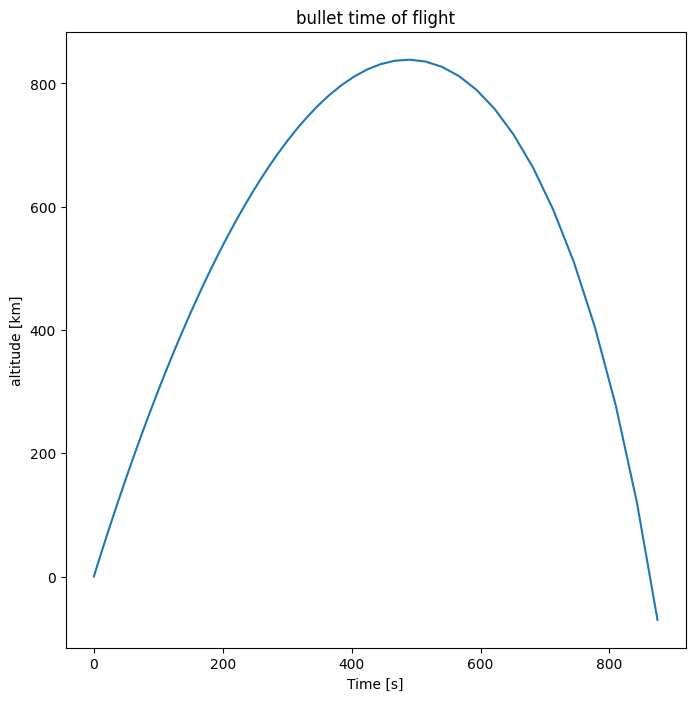

bullet time of flight: 874.5812737618805 s


In [8]:
# bullet time

r = np.linalg.norm(bullet_trajectory[:,1,:], axis=1) - R

plt.figure(figsize=(8,8))
plt.plot(bullet_time, r, label='bullet')
plt.xlabel('Time [s]')
plt.ylabel('altitude [km]')
plt.title('bullet time of flight')
plt.show()

print('bullet time of flight:', bullet_time[-1], 's')

In [9]:
# bullet travel distance

alpha = np.arctan(bullet_trajectory[-1,1,1] / bullet_trajectory[-1,1,0])

alpha = np.pi/2 - alpha

travel_distance = R * alpha

print('bullet travel distance:', travel_distance, 'km')

bullet travel distance: 2447.3065667443657 km
